In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score

### Используем dataset IRIS

In [93]:
iris = load_iris()

df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Нормализуем

In [94]:
X = df
y = iris.target
for column in X:
    X[column] = (X[column] - X[column].mean()) / X[column].std()
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


<Axes: xlabel='Attr1', ylabel='Attr2'>

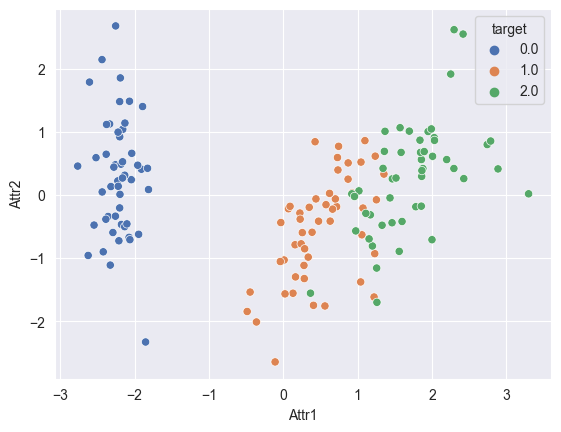

In [95]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=np.c_[X_pca, y], columns=['Attr1', 'Attr2', 'target'])

sns.scatterplot(x="Attr1", y="Attr2", hue="target", palette="deep", data=df_pca)

In [96]:
def show_graph(model, option):
    labels_kmeans = model.fit_predict(X)
    df_pca[option] = labels_kmeans
    print('Inner metric from ARI: ', adjusted_rand_score(y, labels_kmeans))
    print('Outer metric from Silhouette: ', silhouette_score(X, labels_kmeans))
    sns.scatterplot(x="Attr1", y="Attr2", hue=option, palette="deep", data=df_pca[df_pca[option] != -1])

In [97]:
def print_graph(x, y1, x_name, y_name, title):
    sns.lineplot(x=x, y=y1)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(title)

C:\Users\vovak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inner metric from ARI:  0.6201351808870379
Outer metric from Silhouette:  0.45994823920518635


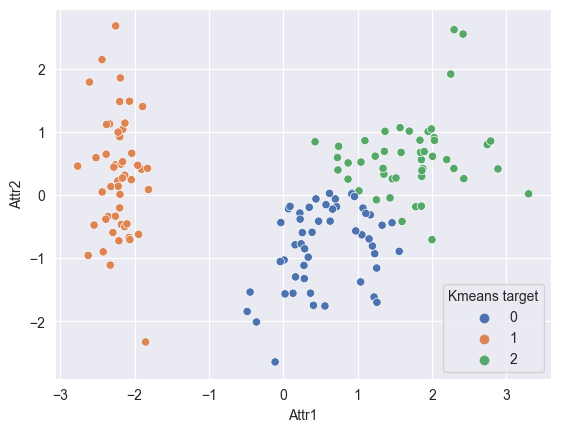

In [98]:
km = KMeans(n_clusters=3)
show_graph(model=km, option='Kmeans target')

Inner metric from ARI:  0.27919050283369684
Outer metric from Silhouette:  0.009426257445526231


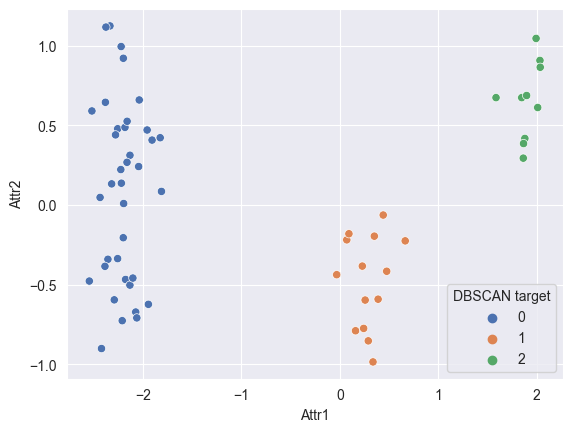

In [99]:
dbs = DBSCAN(eps=0.5, min_samples=10)
show_graph(dbs, 'DBSCAN target')

In [100]:
def predict_and_calculate(model, metric, arg):
    labels_pred = model.fit_predict(X)
    silhouette = metric(arg, labels_pred)
    return silhouette

## Анализ Kmeans

#### Внутренняя метрика

C:\Users\vovak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vovak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vovak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

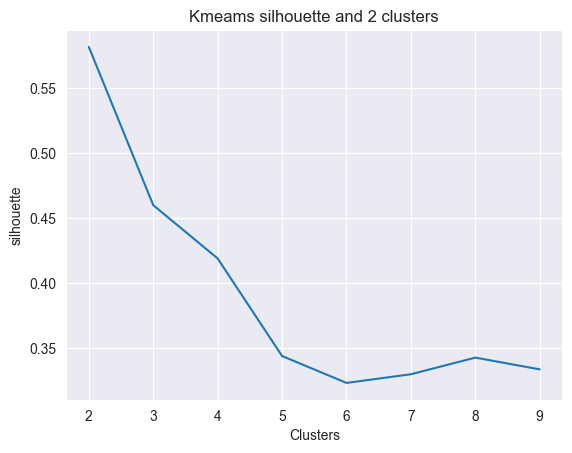

In [101]:
n_clusters = np.arange(2, 10)
scores = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    scores.append(predict_and_calculate(kmeans, silhouette_score, X))

print_graph(n_clusters, scores, 'Clusters', 'silhouette', 'Kmeams silhouette and 2 clusters')

#### Внешняя метрика

C:\Users\vovak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vovak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vovak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

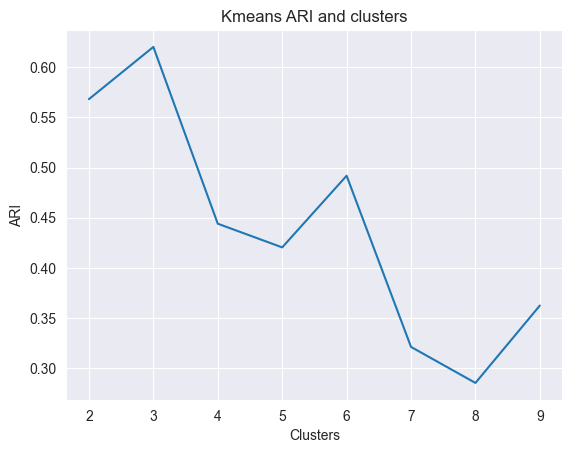

In [102]:
n_clusters = np.arange(2, 10)
scores = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    scores.append(predict_and_calculate(kmeans, adjusted_rand_score, y))

print_graph(n_clusters, scores, 'Clusters', 'ARI', 'Kmeans ARI and clusters')

## DBSCAN анализ метрик

#### Внутренняя метрика

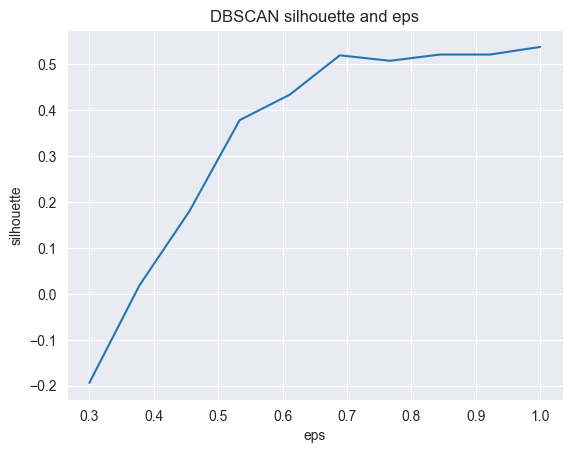

In [103]:
eps_values = np.linspace(0.3, 1.0, num=10)
scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    scores.append(predict_and_calculate(dbscan, silhouette_score, X))

print_graph(eps_values, scores, 'eps', 'silhouette', 'DBSCAN silhouette and eps')

#### Внешняя метрика

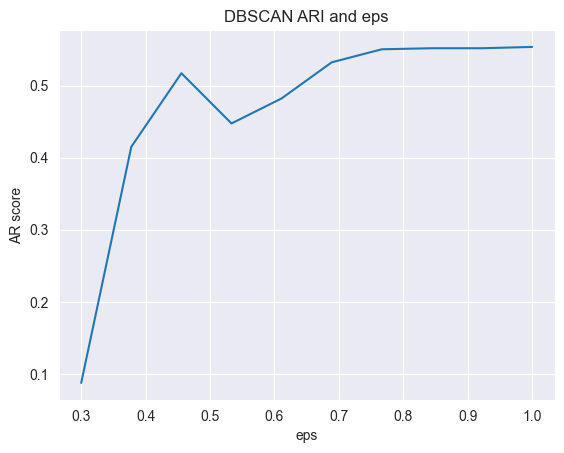

In [104]:
eps_values = np.linspace(0.3, 1.0, num=10)
scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    scores.append(predict_and_calculate(dbscan, adjusted_rand_score, y))

print_graph(eps_values, scores, 'eps', 'AR score', 'DBSCAN ARI and eps')